In [1]:
# Alberto Polo
# NYUID N19683411
# Extract list of stocks and analyze relationship between market capitalization and price volatility

%matplotlib inline
import matplotlib.pyplot as plt
import requests

In [2]:
path = '/home/ap/Data/Documents/NYU/Materials/Quantitative Econ/hw3/'
data_list = open(path + 'company_list_corrected.csv', 'r').readlines()
varnames = data_list.pop(0)

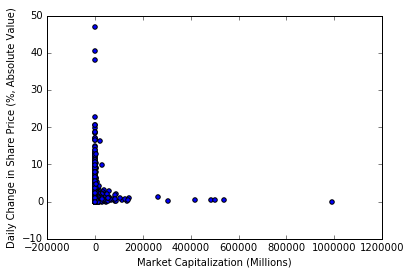

In [3]:
abspchange = []
mkcap = []

# parse csv file
for line in data_list:
    
    if line.find('N/A') == -1:
        
        # fix commas and extract data
        line = line.replace(", "," ")
        line = line.replace(',",',",")
        line = line.replace(",I"," I")      
        id, name, cap = line.split(',')
        id = id.replace('"',"")

        # convert market capitalization in millions
        if cap.find("B") != -1:
            cap = float(cap.replace("B",""))*1000
        elif cap.find("M")!= -1:
            cap = float(cap.replace("M",""))
        else:
            cap = float(cap)/1000000
        
        # fill in mkcap
        mkcap.append(cap)
        
        # fill in pchange
        dest = 'http://finance.yahoo.com/d/quotes.csv?s=' + id + '&f=p2'
        pch = requests.get(dest).text
        abspchange.append(float(pch.strip('"%-+\n'))) # remove -sign to get absolute value

# plot mkt capitalization vs. absolute percentage change in price
plt.scatter(mkcap, abspchange)
plt.xlabel('Market Capitalization (Millions)')
plt.ylabel('Daily Change in Share Price (%, Absolute Value)')

In [ ]:
# lower capitalization stocks apprear to have higher price volatility according to the daily change in share price